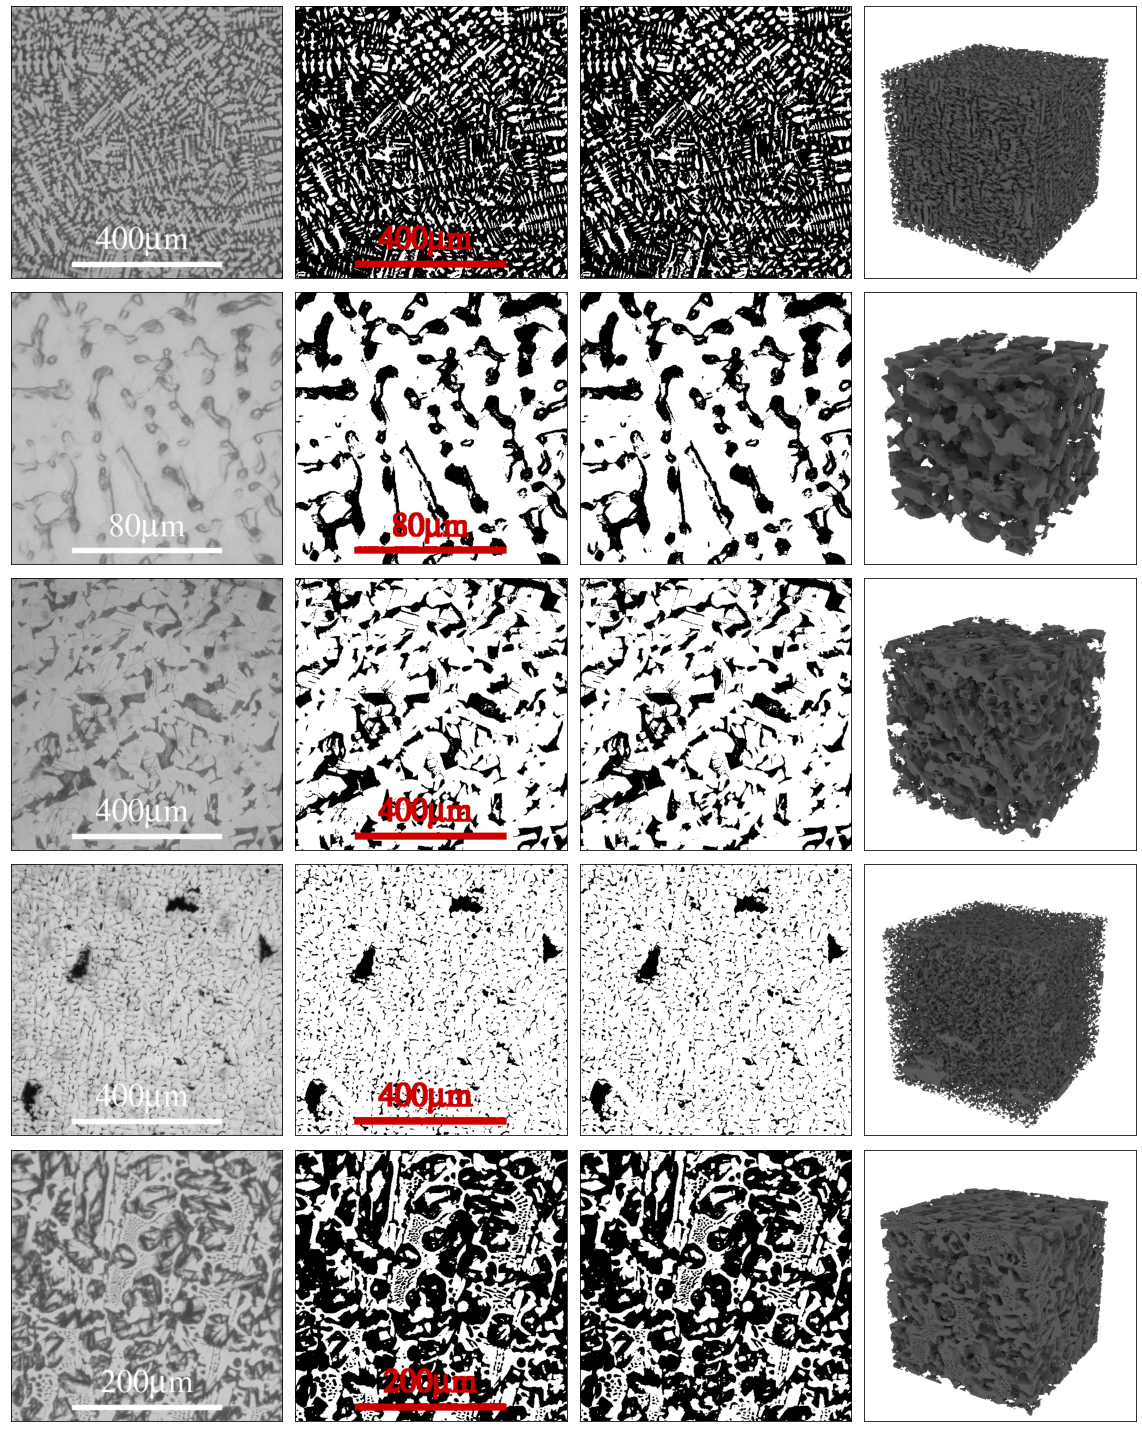

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import os
tags = ['010', '011', '043', '047', '070']
n = len(tags)
fsize = 4
fig, ax = plt.subplots(n, 4, figsize = (fsize*4, fsize*5))
for a in ax.ravel():
    a.set_xticks([])
    a.set_yticks([])

for i, tag in enumerate(tags):
    final = plt.imread(f'data/micrographs_final_cropped/micro{tag}.png')
    original = plt.imread(f'data/micrographs_png/000{tag}.png')
    mask = plt.imread(f'data/micrographs_final_cropped/micro{tag}.png')
    cube = plt.imread(f'C:/Users/sk3619/SliceGAN/Dataset/microstructure{tag}/microstructure{tag}frames/frame_00060.png')
    sb = np.zeros_like(mask)
    sb[original>0.95] = 1
    from copy import deepcopy
    sbcore = deepcopy(sb)
    for sh in range(-2, 2):
        for dim in range(2):
            sb += np.roll(sb, sh, dim)
    # sb/=sb.max()
    sb[sb>1] = 1
    mask[...,:3][sb[...,:3]==1] = 0
    # mask[...,1:3][sbcore[...,1:3]==1]  = 0
    mask[...,0][sb[...,0]==1] = 0.8
    # mask[...,0][sbcore[...,0]==1]  = 1
    # mask[...,:3][sbcore[...,:3]==1]  = 1


    ax[i, 0].imshow(original)
    ax[i, 1].imshow(mask)
    ax[i, 2].imshow(final)
    ax[i, 3].imshow(cube)

plt.tight_layout()

fig.savefig('inpainting.png', format='png', dpi=300)


loading


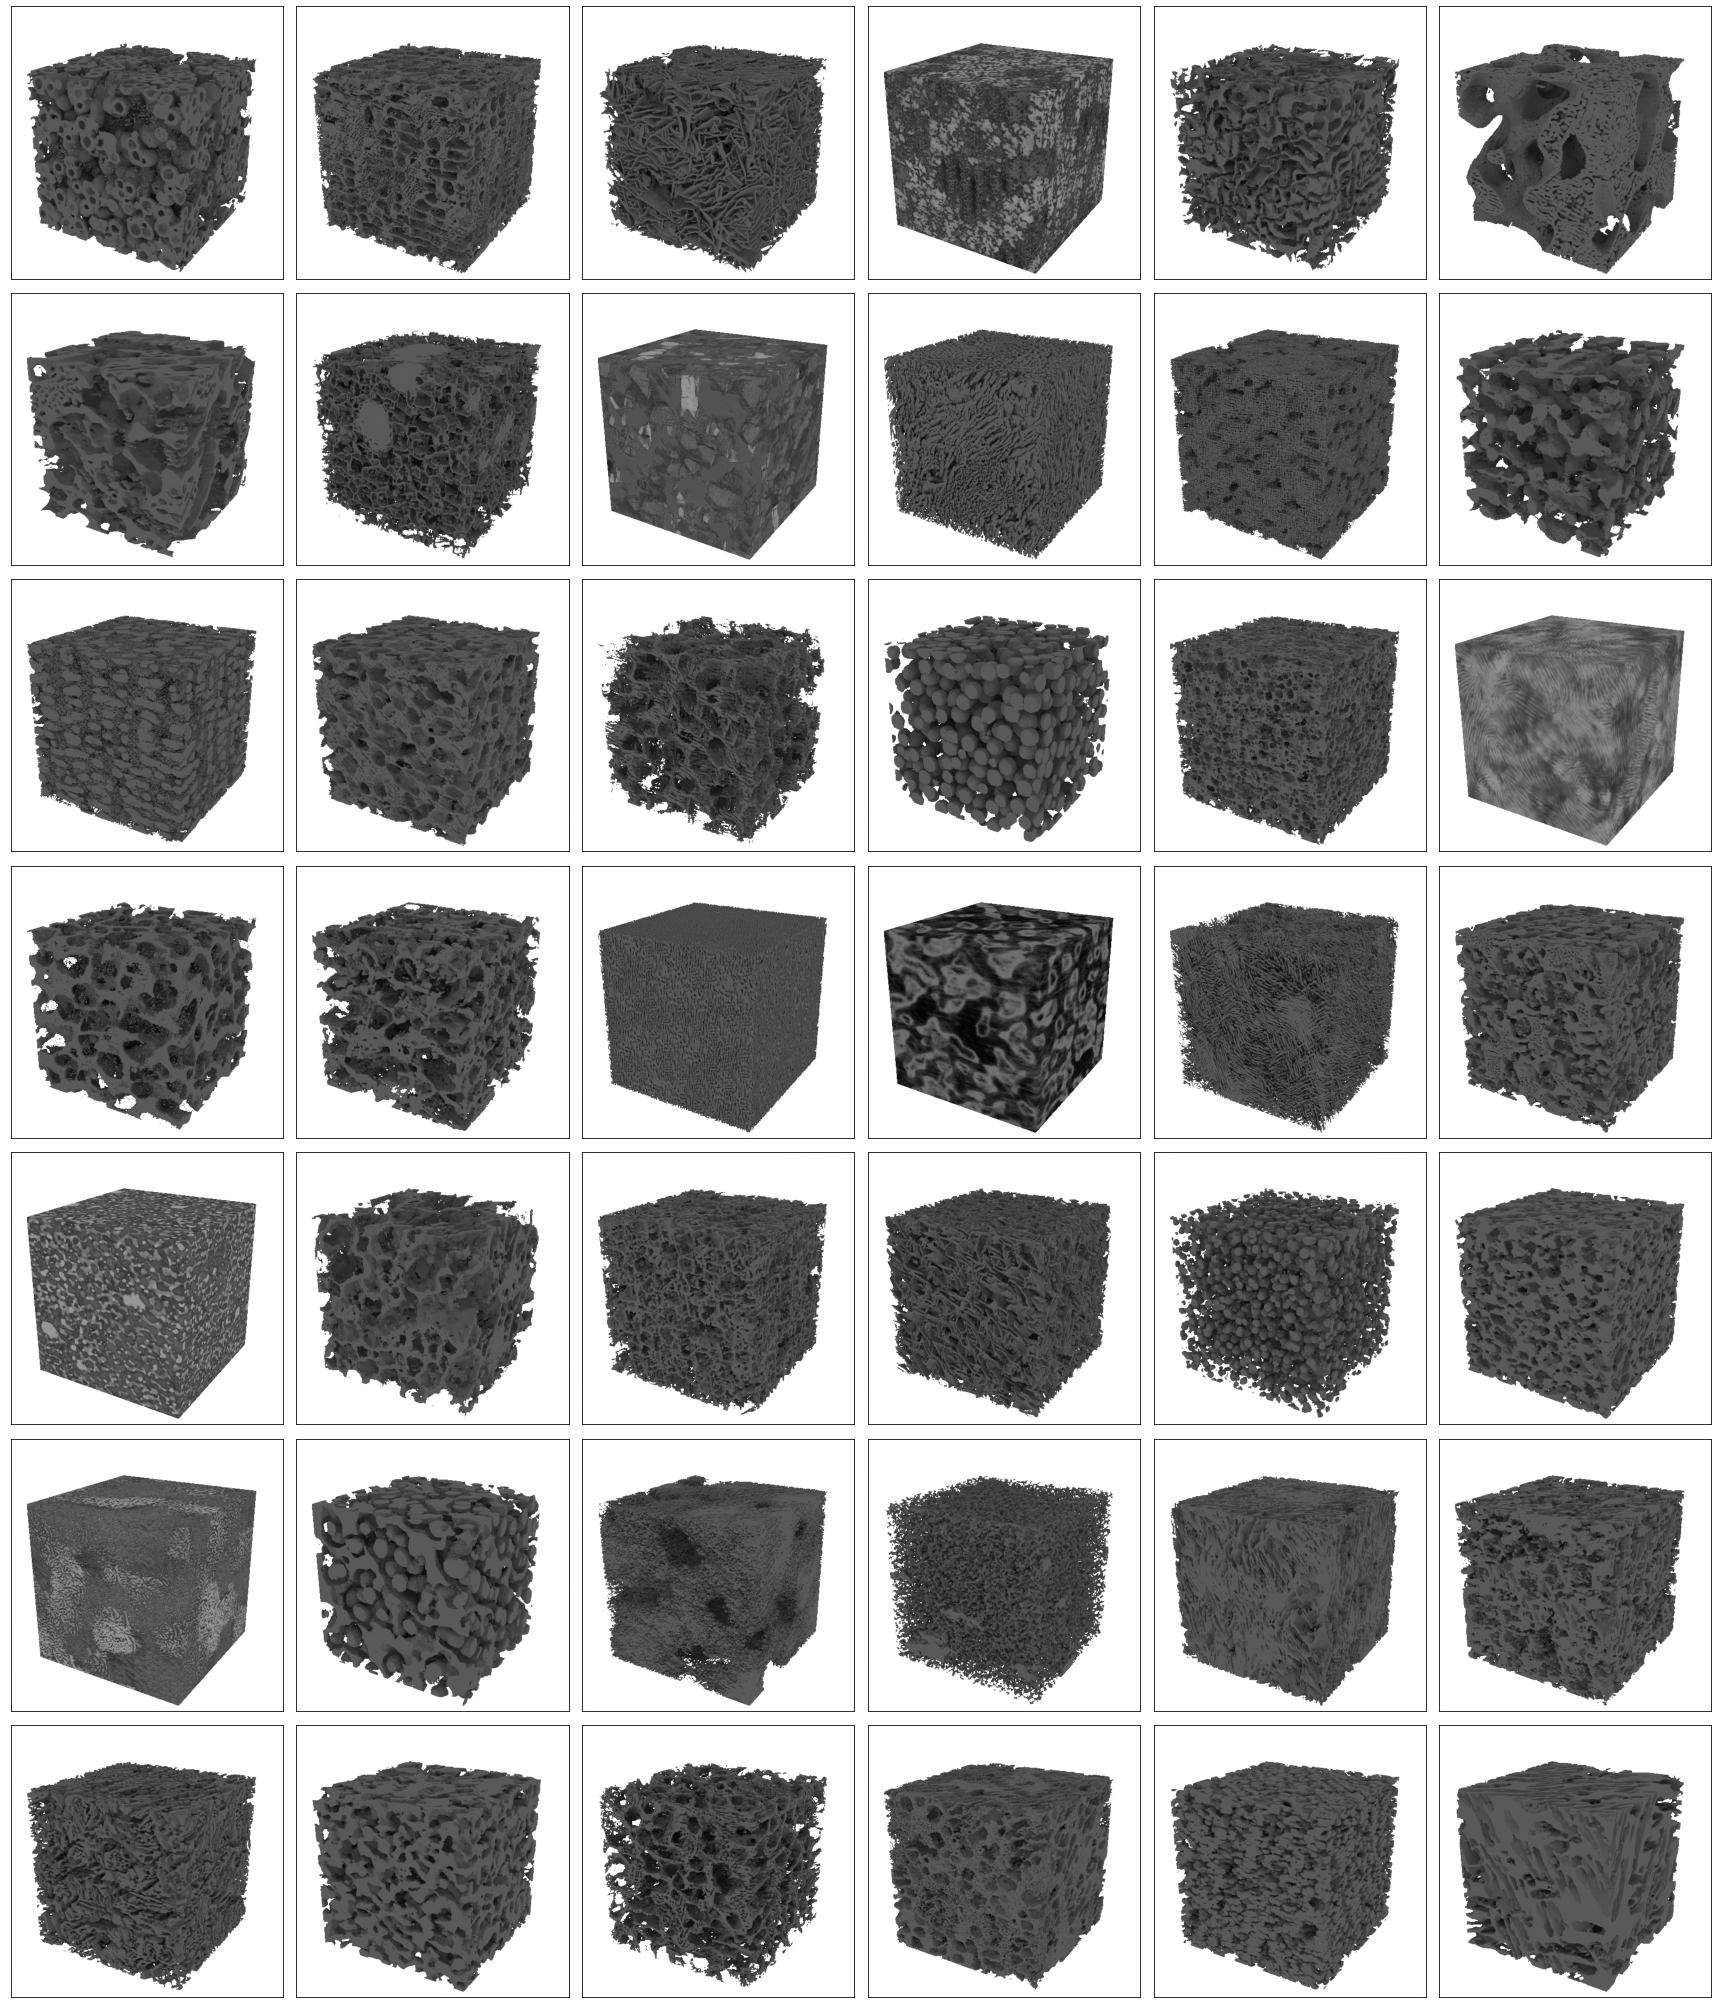

In [67]:
import json
cubes = []
with open(f'faves.json', 'r') as f:
    faves = json.load(f)
print('loading')
for i in range(10):
    for tag in faves.keys():
        if faves[tag] == i:
            cubes.append(plt.imread(f'C:/Users/sk3619/SliceGAN/Dataset/{tag}/{tag}frames/frame_00060.png'))
r, c = 7, 6
fig, ax = plt.subplots(r, c, figsize = (fsize*c, fsize*r))

for a, cube in zip(ax.ravel(), cubes):
    a.set_xticks([])
    a.set_yticks([])
    a.imshow(cube)
plt.tight_layout()
fig.savefig('cubes_array.png')
